The purpose of this notebook is to perform analysis for the Best Service International Case Study

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import display #this is so that we can use display to view the tables in a more presentable manner

In [8]:
data_folder = "../Data" #defining a relative path to the data file
excel_file_path = os.path.join(data_folder, "Best Service International Sales Data.xlsx") #Construct a full path including the Excel file

excel_file = pd.ExcelFile(excel_file_path)
print('The names of the sheets in the file are as follows:', excel_file.sheet_names)

The names of the sheets in the file are as follows: ['Sales Data', 'PTT Lead Data', 'Staff List']


In [10]:
dfs = pd.read_excel(excel_file_path, sheet_name=None)
print('The Sales Data table looks as follows')
display(dfs['Sales Data'].head())
print()
print('The Portfolio Tracker Tool table looks as follows')
display(dfs['PTT Lead Data'].head())
print()
print('The Staff List table looks as follows')
display(dfs['Staff List'].head())

The Sales Data table looks as follows


,Sale Date,Cell Number,Sale Consultant Employee Number,Province,Branch,Lead Source,conditions,Product Range,Concluded,Valid Sale?
0,2020/01/02,721585874,D194371,Not Applicable,Not Applicable,Proactive Engagement,No,Savings & Investments,Yes,Valid Sale
1,2020/01/02,835550504,D194371,Not Applicable,Not Applicable,Proactive Engagement,Yes,Savings & Investments,Yes,Invalid Sale
2,2020/01/02,614651899,D194371,Not Applicable,Not Applicable,Proactive Engagement,Yes,Savings & Investments,Yes,Valid Sale
3,2020/01/02,717053334,D194371,Not Applicable,Not Applicable,Proactive Engagement,No,Savings & Investments,Yes,Valid Sale
4,2020/01/02,825127720,D194371,Not Applicable,Not Applicable,Proactive Engagement,Yes,Savings & Investments,Yes,Invalid Sale



The Portfolio Tracker Tool table looks as follows


,Cell Number,Month,Sale Consultant Employee Number,Customer Location
0,721585874,Jan,D217104,Gauteng
1,835550504,Jan,D198743,Northern Cape
2,614651899,Jan,D215604,Western Cape
3,717053334,Jan,D226001,Limpopo
4,825127720,Jan,D205062,Mpumalanga



The Staff List table looks as follows


,Name,Employee Number,Team Leader
0,Susana Chaffins,D217104,John Smith
1,Asley Loch,D198743,Thabo Matangu
2,Hedy Kimmell,D215604,Sarah Jacobs
3,Martha Frechette,D226001,Jessica Grove
4,Luke Torian,D205062,Sarah Jacobs


In [12]:
print('The Sales Data table has ', dfs['Sales Data'].shape[0], ' rows')
print('The Portfolio Tracker Tool table has ', dfs['PTT Lead Data'].shape[0], ' rows')
print('The Staff List table has ', dfs['Staff List'].shape[0], ' rows')

The Sales Data table has  12018  rows
The Portfolio Tracker Tool table has  360329  rows
The Staff List table has  37  rows


In [14]:
display(dfs['Sales Data'].sample(n=15))

,Sale Date,Cell Number,Sale Consultant Employee Number,Province,Branch,Lead Source,conditions,Product Range,Concluded,Valid Sale?
8161,2020/05/22,838979230,D215099,Not Applicable,Not Applicable,Proactive Engagement,No,Savings & Investments,Yes,Valid Sale
3306,2020/02/05,812360590,D217092,Not Applicable,Not Applicable,Proactive Engagement,No,Insurance,Yes,Valid Sale
9923,2020/09/16,848785120,D198743,Not Applicable,Not Applicable,Proactive Engagement,No,Loan,Yes,Valid Sale
7719,2020/04/29,713095281,D217104,Not Applicable,Not Applicable,Proactive Engagement,No,Loan,Yes,Valid Sale
6379,2020/03/16,724633415,D216280,Not Applicable,Not Applicable,Proactive Engagement,Yes,Savings & Investments,Yes,Invalid Sale
5175,2020/03/02,714656117,D194371,Not Applicable,Not Applicable,Proactive Engagement,No,Insurance,Yes,Valid Sale
8484,2020/06/10,724357341,D217055,Not Applicable,Not Applicable,Proactive Engagement,No,Current Account,Yes,Valid Sale
6285,2020/03/16,827315499,D122609,Not Applicable,Not Applicable,Proactive Engagement,No,Savings & Investments,Yes,Valid Sale
6203,2020/03/12,848660963,D216280,Not Applicable,Not Applicable,Proactive Engagement,Yes,Savings & Investments,Yes,Valid Sale
10509,2020/10/12,828588867,D215606,Not Applicable,Not Applicable,Proactive Engagement,No,Loan,Yes,Valid Sale


In order to make the data faster to work with, I will use only the fields I think are important in the Sales Data table. This means dropping the Province, Branch, and Concluded fields. The necessary fields will be added to a new data frame called salesData

In [16]:
selected_col = ['Sale Date', 'Sale Consultant Employee Number', 'Product Range', 'Valid Sale?']
salesData = dfs['Sales Data'][selected_col]
display(salesData.sample(n=15))

,Sale Date,Sale Consultant Employee Number,Product Range,Valid Sale?
3584,2020/02/10,D184243,Savings & Investments,Valid Sale
2051,2020/01/23,D235282,Credit Card,Invalid Sale
259,2020/01/06,D216360,Credit Card,Valid Sale
10576,2020/10/14,D227647,Loan,Invalid Sale
1634,2020/01/17,D235282,Savings & Investments,Valid Sale
11531,2020/12/01,D227647,Loan,Valid Sale
7758,2020/04/30,D227647,Loan,Valid Sale
7645,2020/04/22,D198743,Loan,Valid Sale
8343,2020/06/03,D215099,Loan,Valid Sale
6745,2020/03/20,D122609,Savings & Investments,Valid Sale


In [18]:
display(salesData.sample(n=20))

,Sale Date,Sale Consultant Employee Number,Product Range,Valid Sale?
7756,2020/04/30,D227647,Loan,Valid Sale
6703,2020/03/19,D227647,Savings & Investments,Invalid Sale
3296,2020/02/05,D198743,Insurance,Valid Sale
4292,2020/02/18,D197761,Savings & Investments,Valid Sale
9847,2020/09/14,D198743,Loan,Invalid Sale
8013,2020/05/13,D215604,Credit Card,Valid Sale
10967,2020/11/04,D227647,Current Account,Valid Sale
8139,2020/05/21,D184243,Loan,Valid Sale
9877,2020/09/15,D217107,Loan,Valid Sale
3254,2020/02/05,D215074,Savings & Investments,Valid Sale


In [20]:
display(dfs['PTT Lead Data'].sample(n=20))

,Cell Number,Month,Sale Consultant Employee Number,Customer Location
72295,799000680,Mar,D127811,Eastern Cape
288427,797339251,Oct,D215097,Mpumalanga
295192,835231015,Oct,D176968,Northern Cape
206204,827489802,July,D226001,Free State
156167,716200788,Jun,D227647,Kwazulu Natal
296700,828569985,Oct,D127811,North West
44873,828796625,Feb,D184243,Kwazulu Natal
284338,827973277,Oct,D217055,Northern Cape
217656,823283111,Aug,D218882,Gauteng
81359,822453753,Mar,D223172,Kwazulu Natal


In [22]:
selected_col = ['Month', 'Sale Consultant Employee Number']
leadData = dfs['PTT Lead Data'][selected_col]
display(leadData.sample(n=15))

,Month,Sale Consultant Employee Number
324910,Nov,D217093
340599,Dec,D217092
138483,May,D184243
32366,Feb,D217107
292136,Oct,D215474
32536,Feb,D217093
90421,Apr,D217055
180424,July,D215097
357202,Dec,D205062
212479,Aug,D216360


In [24]:
selected_col = ['Name ','Employee Number','Team Leader ']
staffData = dfs['Staff List'][selected_col]
display(staffData.sample(n=15))

,Name,Employee Number,Team Leader
24,Tisa Prieto,D197761,John Smith
26,Collette Westrick,D219016,Bonolo Tshube
33,Deedra Yeldell,D223172,Bonolo Tshube
35,Stephan Felan,D214376,Sarah Jacobs
21,Angeline Simpkins,D215474,Sarah Jacobs
29,Mistie Elzy,D184243,Sarah Jacobs
11,Lashay Ames,D215026,John Smith
3,Martha Frechette,D226001,Jessica Grove
10,Jeffry Wagers,D158378,Jessica Grove
4,Luke Torian,D205062,Sarah Jacobs


In [26]:
groupedPTT = leadData.groupby(['Sale Consultant Employee Number', 'Month'])
countGroups = groupedPTT.size()
countGroupsDF = countGroups.reset_index(name='Counts')

display(countGroupsDF)

,Sale Consultant Employee Number,Month,Counts
0,D122609,Apr,850
1,D122609,Aug,763
2,D122609,Dec,789
3,D122609,Feb,847
4,D122609,Jan,789
...,...,...,...
441,D235282,Mar,776
442,D235282,May,798
443,D235282,Nov,836
444,D235282,Oct,740


Above the lead data has been grouped by employee number, then by the months, and there is a count for how many leads have been assigned per employee for every month. This data can help answer the following questions:
1. We can compare the count for number of leads to the sales attempted and valid sales
2. We can confirm that every employee has been allocated a reasonale amount of leads for every month
3. This is an edge case, but we can explore if there is any correlation between the number of leads and sales made (valid or overall)

In [29]:
groupedLeadData = countGroupsDF.dropna() #this is to remove any invalid entries
display(groupedLeadData)

,Sale Consultant Employee Number,Month,Counts
0,D122609,Apr,850
1,D122609,Aug,763
2,D122609,Dec,789
3,D122609,Feb,847
4,D122609,Jan,789
...,...,...,...
441,D235282,Mar,776
442,D235282,May,798
443,D235282,Nov,836
444,D235282,Oct,740


In [31]:
employees = groupedLeadData['Sale Consultant Employee Number'].unique()
print(len(employees))

37


In [33]:
37 * 12

444

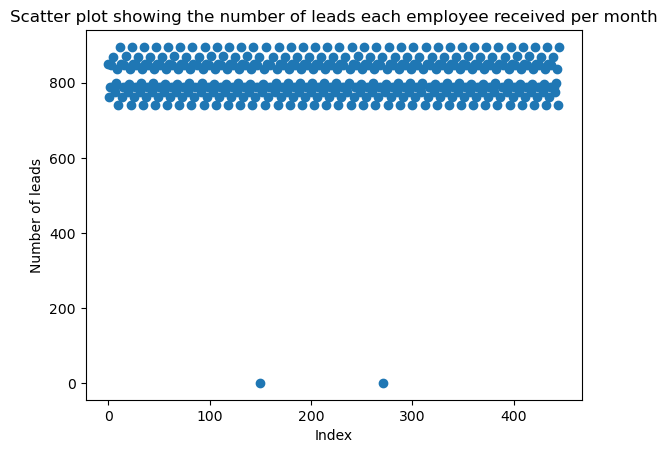

In [35]:
plt.scatter(groupedLeadData.index, groupedLeadData['Counts'])
plt.xlabel('Index')
plt.ylabel('Number of leads')
plt.title('Scatter plot showing the number of leads each employee received per month')
plt.show()

In [37]:
display(groupedLeadData[groupedLeadData['Counts'] < 200])

,Sale Consultant Employee Number,Month,Counts
150,D214405,July,1
271,D215608,July,1


In [39]:
display(groupedLeadData[groupedLeadData['Sale Consultant Employee Number'] == 'D214405'])

,Sale Consultant Employee Number,Month,Counts
144,D214405,Apr,850
145,D214405,Aug,763
146,D214405,Dec,788
147,D214405,Feb,846
148,D214405,Jan,789
149,D214405,July,869
150,D214405,July,1
151,D214405,Jun,788
152,D214405,Mar,776
153,D214405,May,797


In [41]:
display(groupedLeadData[groupedLeadData['Sale Consultant Employee Number'] == 'D215608'])

,Sale Consultant Employee Number,Month,Counts
265,D215608,Apr,850
266,D215608,Aug,763
267,D215608,Dec,788
268,D215608,Feb,846
269,D215608,Jan,789
270,D215608,July,869
271,D215608,July,1
272,D215608,Jun,788
273,D215608,Mar,776
274,D215608,May,797


From the above it is clear that each employee received upward of 700 leads monthly, and the only months that show otherwise are a mistake that happens for the month of July, twice.

In [44]:
groupedStaffData = staffData.groupby('Team Leader ')
countGroups = groupedStaffData.size()
employeesPerLead = countGroups.reset_index(name='Employees per team')

display(employeesPerLead)

,Team Leader,Employees per team
0,Bonolo Tshube,8
1,Jessica Grove,4
2,John Smith,13
3,Sarah Jacobs,9
4,Thabo Matangu,3


We can see from the above that the team sizes are not equal, if we are to compare the performance of each team we need to find an average amount as the data may possibly be skewed by team size

Useful data structures:
1. employeesPerLead
2. staffData
3. salesData

In [66]:
display(salesData.sample(n=20))

,Sale Date,Sale Consultant Employee Number,Product Range,Valid Sale?
30,2020-01-02,D197761,Savings & Investments,Invalid Sale
7146,2020-03-30,D122609,Credit Card,Valid Sale
11671,2020-12-07,D205062,Loan,Valid Sale
7561,2020-04-16,D219016,Credit Card,Valid Sale
2356,2020-01-28,D194371,Savings & Investments,Valid Sale
11708,2020-12-08,D184243,Loan,Valid Sale
2193,2020-01-24,D198743,Insurance,Valid Sale
8517,2020-06-11,D214376,Loan,Valid Sale
11527,2020-12-01,D205062,Loan,Valid Sale
3628,2020-02-10,D216280,Savings & Investments,Valid Sale


Trends that we will be exploring for the sales data:
1. Counting the sales per employee per month (compare to baseline assuming 3 sales per day)(visual)
2. Sales validity per product range (visual to compare)
3. Exploring sales per day and the correlation between that and the team lead

In [51]:
#salesData['Sale Date'] = pd.to_datetime(salesData['Sale Date']) this threw an error
salesData.loc[:, 'Sale Date'] = pd.to_datetime(salesData['Sale Date']) #this is a second attempt at converting the date to a datetime

The average number of workdays in a month, assuming the workdays are Monday to Friday, can be calculated by considering the typical number of days in a month and excluding weekends.

Here's a quick breakdown:

A year has 365 days (or 366 in a leap year).

There are 52 weeks in a year.

Each week has 5 workdays (Monday to Friday) and 2 weekend days (Saturday and Sunday).

52 weeks × 5 workdays = 260 workdays in a year.

Since there are 12 months in a year, the average number of workdays per month would be: $$\text{Average workdays per month} = \frac{260 \text{ workdays}}{12 \text{ months}} \approx 21.67 \text{ workdays per month}$$

So, on average, there are about 21 to 22 workdays in a month. Of course, this can vary slightly depending on the specific month and any public holidays that may fall on weekdays. We will be working with the assumption that there are 21 workdays in a month

In [54]:
workDaysPerMonth = 21

The sequence below was a battle between me and Pandas. It kept saying I'm making changes to a view of a copy or some crap like that, this is the solution around it with the help of Copilot. At least I still got to use salesData, but bloody hell mate. It worked the day before, then all of a sudden it didn't.

In [64]:
salesData.loc[:, 'Sale Date'] = pd.to_datetime(salesData.loc[:, 'Sale Date'], errors='coerce')

In [86]:
salesData_c = salesData.loc[:, ['Sale Date']].copy()

In [88]:
print(salesData_c[salesData_c['Sale Date'].isnull()])

Empty DataFrame
Columns: [Sale Date]
Index: []


In [90]:
salesData_c['Month'] = salesData_c['Sale Date'].dt.month

In [92]:
salesData.loc[salesData_c.index, 'Month'] = salesData_c['Month']

In [94]:
display(salesData.sample(n=20))

,Sale Date,Sale Consultant Employee Number,Product Range,Valid Sale?,Month
4918,2020-02-26,D184243,Savings & Investments,Valid Sale,2
10424,2020-10-07,D227647,Insurance,Valid Sale,10
5181,2020-03-02,D194371,Savings & Investments,Valid Sale,3
3802,2020-02-12,D217093,Savings & Investments,Invalid Sale,2
7029,2020-03-26,D198743,Savings & Investments,Valid Sale,3
5259,2020-03-02,D227647,Savings & Investments,Valid Sale,3
2486,2020-01-28,D216280,Insurance,Valid Sale,1
8335,2020-06-02,D215604,Insurance,Valid Sale,6
428,2020-01-07,D216360,Savings & Investments,Valid Sale,1
1625,2020-01-17,D235282,Savings & Investments,Valid Sale,1


In [96]:
groupedSalesData = salesData.groupby(['Sale Consultant Employee Number', 'Month'])
countEmployeeMonth = groupedSalesData.size()
employeeSalesPMonth = countEmployeeMonth.reset_index(name='Sales per month')

display(employeeSalesPMonth)

,Sale Consultant Employee Number,Month,Sales per month
0,D122609,1,101
1,D122609,2,124
2,D122609,3,153
3,D122609,4,4
4,D122609,5,39
...,...,...,...
272,D235282,3,62
273,D235282,4,6
274,D235282,5,4
275,D235282,7,2


The table above shows us the sales per month for each employee every month. I am now going to convert this to the call per day rate using the work days per month constant referenced earlier. Employees meeting their target should have their sales rate at 3 and above

In [99]:
employeeSalesPMonth.loc[:, 'Sales Rate'] = employeeSalesPMonth['Sales per month']/workDaysPerMonth

In [101]:
display(employeeSalesPMonth)

,Sale Consultant Employee Number,Month,Sales per month,Sales Rate
0,D122609,1,101,4.809524
1,D122609,2,124,5.904762
2,D122609,3,153,7.285714
3,D122609,4,4,0.190476
4,D122609,5,39,1.857143
...,...,...,...,...
272,D235282,3,62,2.952381
273,D235282,4,6,0.285714
274,D235282,5,4,0.190476
275,D235282,7,2,0.095238


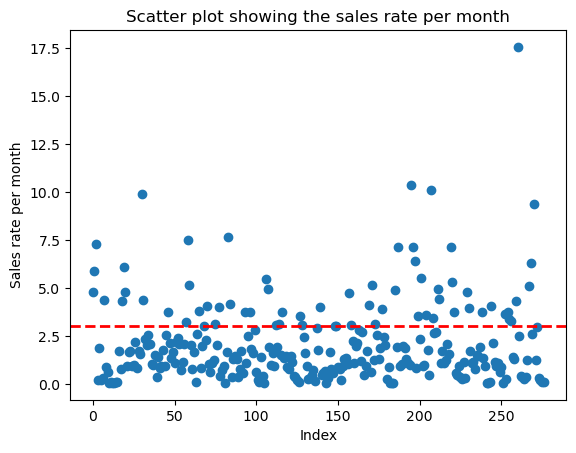

In [103]:
plt.scatter(employeeSalesPMonth.index, employeeSalesPMonth['Sales Rate'])
plt.xlabel('Index')
plt.ylabel('Sales rate per month')
plt.title('Scatter plot showing the sales rate per month')
plt.axhline(y=3, color='red', linestyle='--', linewidth=2, label='Sales rate target = 3')
plt.show()

From the scatter plot above we can see that most of the months the employees sales rate is well below the target of 3 sales per day. We are going to do a further breakdown to see if there are any correlations with:
1. The month
2. Specific sales consultants
3. Specific sales consultants team leads

An update to the useful datastructures:
1. employeesPerLead
2. staffData
3. salesData
4. employeeSalesPMonth
5. employeesPerLead

In [106]:
meanMonthlySalesRate = employeeSalesPMonth.groupby('Month')['Sales Rate'].mean()
meanMonthlySalesRate = meanMonthlySalesRate.reset_index()
display(meanMonthlySalesRate)

,Month,Sales Rate
0,1,4.297619
1,2,3.290043
2,3,4.072381
3,4,0.995671
4,5,1.055556
5,6,1.021978
6,7,1.197802
7,8,0.934240
8,9,1.458874
9,10,1.555556


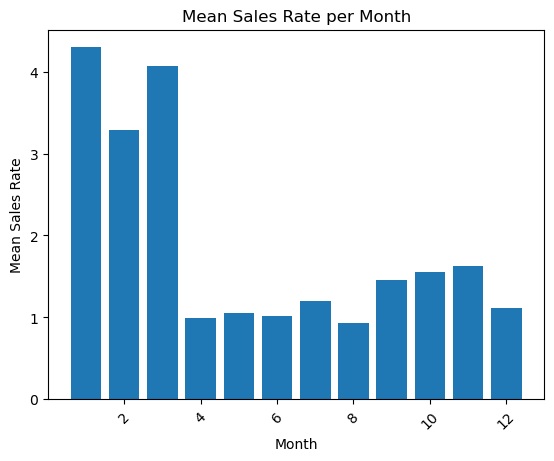

In [108]:
plt.bar(meanMonthlySalesRate['Month'],meanMonthlySalesRate['Sales Rate'])
plt.xlabel('Month') 
plt.ylabel('Mean Sales Rate') 
plt.title('Mean Sales Rate per Month') 
plt.xticks(rotation=45)

plt.show()

It is clear from the bar graph above that on average there is a steep drop off in sales attempted after the pandemic hit in April. We will separate the months before and after the pandemic for sanitary purposes for any analysis going forward. This is because the data being recorded after the pandemic is fundamentally different. The focus of the problem and solution is also focused post-pandemic.

Next up:
separate the data pre and post pandemic
merge the employee team lead data into the sales table so we can start spotting trends

In [112]:
display(employeeSalesPMonth)
display(staffData)

,Sale Consultant Employee Number,Month,Sales per month,Sales Rate
0,D122609,1,101,4.809524
1,D122609,2,124,5.904762
2,D122609,3,153,7.285714
3,D122609,4,4,0.190476
4,D122609,5,39,1.857143
...,...,...,...,...
272,D235282,3,62,2.952381
273,D235282,4,6,0.285714
274,D235282,5,4,0.190476
275,D235282,7,2,0.095238


,Name,Employee Number,Team Leader
0,Susana Chaffins,D217104,John Smith
1,Asley Loch,D198743,Thabo Matangu
2,Hedy Kimmell,D215604,Sarah Jacobs
3,Martha Frechette,D226001,Jessica Grove
4,Luke Torian,D205062,Sarah Jacobs
5,Julee Oler,D215099,John Smith
6,Chet Mcshan,D176968,Thabo Matangu
7,Beaulah Eastman,D235282,John Smith
8,Romeo Trinidad,D212664,Jessica Grove
9,Krysten Numbers,D215606,Sarah Jacobs


In [114]:
staffXRateData = pd.merge(employeeSalesPMonth, staffData, left_on='Sale Consultant Employee Number', right_on='Employee Number')
display(staffXRateData)

,Sale Consultant Employee Number,Month,Sales per month,Sales Rate,Name,Employee Number,Team Leader
0,D122609,1,101,4.809524,Kit Mcqueen,D122609,John Smith
1,D122609,2,124,5.904762,Kit Mcqueen,D122609,John Smith
2,D122609,3,153,7.285714,Kit Mcqueen,D122609,John Smith
3,D122609,4,4,0.190476,Kit Mcqueen,D122609,John Smith
4,D122609,5,39,1.857143,Kit Mcqueen,D122609,John Smith
...,...,...,...,...,...,...,...
272,D235282,3,62,2.952381,Beaulah Eastman,D235282,John Smith
273,D235282,4,6,0.285714,Beaulah Eastman,D235282,John Smith
274,D235282,5,4,0.190476,Beaulah Eastman,D235282,John Smith
275,D235282,7,2,0.095238,Beaulah Eastman,D235282,John Smith


In [116]:
groupedStaffXRateData = staffXRateData.groupby('Team Leader ')['Sales Rate'].mean()
groupedStaffXRateData = groupedStaffXRateData.reset_index()
display(groupedStaffXRateData)

,Team Leader,Sales Rate
0,Bonolo Tshube,1.753968
1,Jessica Grove,1.116883
2,John Smith,2.117104
3,Sarah Jacobs,2.049784
4,Thabo Matangu,2.978022


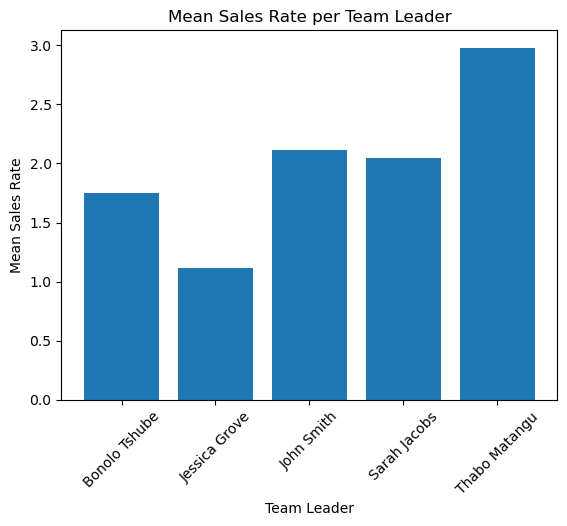

In [118]:
plt.bar(groupedStaffXRateData['Team Leader '],groupedStaffXRateData['Sales Rate'])
plt.xlabel('Team Leader') 
plt.ylabel('Mean Sales Rate') 
plt.title('Mean Sales Rate per Team Leader') 
plt.xticks(rotation=45)

plt.show()

In [120]:
display(employeesPerLead)

,Team Leader,Employees per team
0,Bonolo Tshube,8
1,Jessica Grove,4
2,John Smith,13
3,Sarah Jacobs,9
4,Thabo Matangu,3


In [122]:
teamRateXSize = pd.merge(groupedStaffXRateData,employeesPerLead, on='Team Leader ')
display(teamRateXSize)

,Team Leader,Sales Rate,Employees per team
0,Bonolo Tshube,1.753968,8
1,Jessica Grove,1.116883,4
2,John Smith,2.117104,13
3,Sarah Jacobs,2.049784,9
4,Thabo Matangu,2.978022,3


In [124]:
import numpy as np

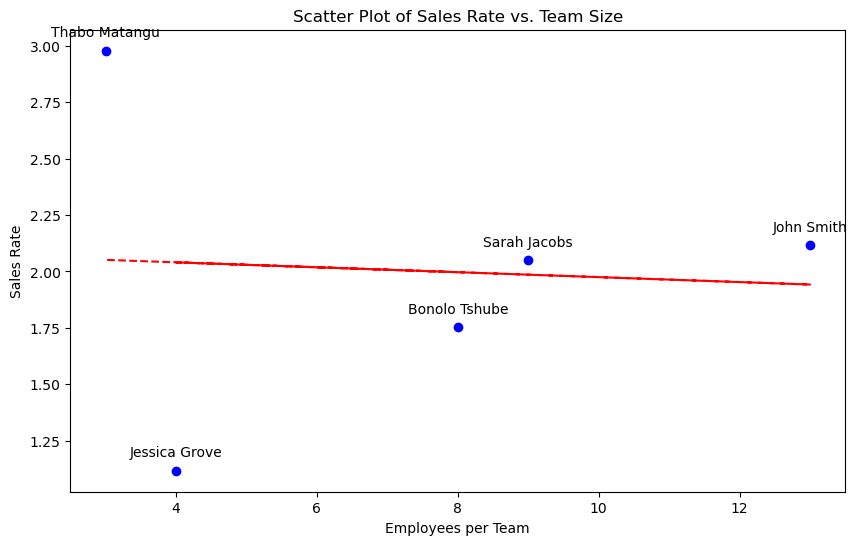

In [126]:
plt.figure(figsize=(10, 6)) 
plt.scatter(teamRateXSize['Employees per team'], teamRateXSize['Sales Rate'], color='blue', marker='o')

plt.xlabel('Employees per Team') 
plt.ylabel('Sales Rate') 
plt.title('Scatter Plot of Sales Rate vs. Team Size')

for i, team in enumerate(teamRateXSize['Team Leader ']): 
    plt.annotate(team, (teamRateXSize['Employees per team'][i], teamRateXSize['Sales Rate'][i]), textcoords="offset points", xytext=(0,10), ha='center')

z = np.polyfit(teamRateXSize['Employees per team'], teamRateXSize['Sales Rate'], 1) 
p = np.poly1d(z) 
plt.plot(teamRateXSize['Employees per team'], p(teamRateXSize['Employees per team']), "r--", label='Trend Line')

#plt.legend() 
plt.show()

The plot above suggests that there is no correlation between team size and the average sales rate of the team and rules that out as a factor.

In [130]:
display(employeeSalesPMonth.sample(n=20))

,Sale Consultant Employee Number,Month,Sales per month,Sales Rate
90,D214376,9,16,0.761905
141,D215473,5,12,0.571429
210,D217093,1,57,2.714286
244,D219016,1,85,4.047619
19,D184243,2,128,6.095238
133,D215099,8,6,0.285714
26,D184243,9,46,2.190476
36,D195038,4,22,1.047619
231,D217107,4,36,1.714286
232,D217107,5,23,1.095238


Below we are about to pivot the staff and rate data table so that it is easier to track each employee's progression through the months.

In [165]:
monthlyProgression = staffXRateData.pivot(index=['Sale Consultant Employee Number','Team Leader '], columns='Month', values='Sales Rate')
monthlyProgression = monthlyProgression.fillna(0)
display(monthlyProgression)

,Month,1,2,3,4,5,6,7,8,9,10,11,12
Sale Consultant Employee Number,Team Leader,,,,,,,,,,,,
D122609,John Smith,4.809524,5.904762,7.285714,0.190476,1.857143,0.190476,0.000000,0.000000,0.285714,4.380952,0.857143,0.619048
D127811,Jessica Grove,0.000000,0.000000,0.047619,0.095238,0.047619,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D158378,Jessica Grove,0.000000,0.000000,0.000000,0.095238,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D176968,Thabo Matangu,1.714286,0.761905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D184243,Sarah Jacobs,4.333333,6.095238,4.809524,0.904762,1.666667,1.714286,0.904762,1.000000,2.190476,0.809524,1.714286,1.571429
D194371,John Smith,9.904762,4.380952,2.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D195038,Bonolo Tshube,2.047619,2.523810,2.095238,1.047619,1.000000,1.523810,0.333333,1.380952,0.809524,0.904762,1.761905,0.904762
D197761,John Smith,2.523810,3.761905,2.142857,1.333333,1.666667,1.095238,2.190476,2.380952,2.095238,0.714286,1.142857,2.095238
D198743,Thabo Matangu,3.238095,7.476190,5.142857,2.047619,0.761905,1.666667,0.095238,2.619048,3.809524,0.809524,1.952381,3.000000


In [171]:
def highlight_cells(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)
    for month in range(1, 13):
        df.loc[x[month] > 1.5, month] = 'background-color: green'

    return df

styled_df = monthlyProgression.style.apply(highlight_cells, axis=None)

display(styled_df)

,Month,1,2,3,4,5,6,7,8,9,10,11,12
Sale Consultant Employee Number,Team Leader,,,,,,,,,,,,
D122609,John Smith,4.809524,5.904762,7.285714,0.190476,1.857143,0.190476,0.000000,0.000000,0.285714,4.380952,0.857143,0.619048
D127811,Jessica Grove,0.000000,0.000000,0.047619,0.095238,0.047619,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D158378,Jessica Grove,0.000000,0.000000,0.000000,0.095238,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D176968,Thabo Matangu,1.714286,0.761905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D184243,Sarah Jacobs,4.333333,6.095238,4.809524,0.904762,1.666667,1.714286,0.904762,1.000000,2.190476,0.809524,1.714286,1.571429
D194371,John Smith,9.904762,4.380952,2.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D195038,Bonolo Tshube,2.047619,2.523810,2.095238,1.047619,1.000000,1.523810,0.333333,1.380952,0.809524,0.904762,1.761905,0.904762
D197761,John Smith,2.523810,3.761905,2.142857,1.333333,1.666667,1.095238,2.190476,2.380952,2.095238,0.714286,1.142857,2.095238
D198743,Thabo Matangu,3.238095,7.476190,5.142857,2.047619,0.761905,1.666667,0.095238,2.619048,3.809524,0.809524,1.952381,3.000000


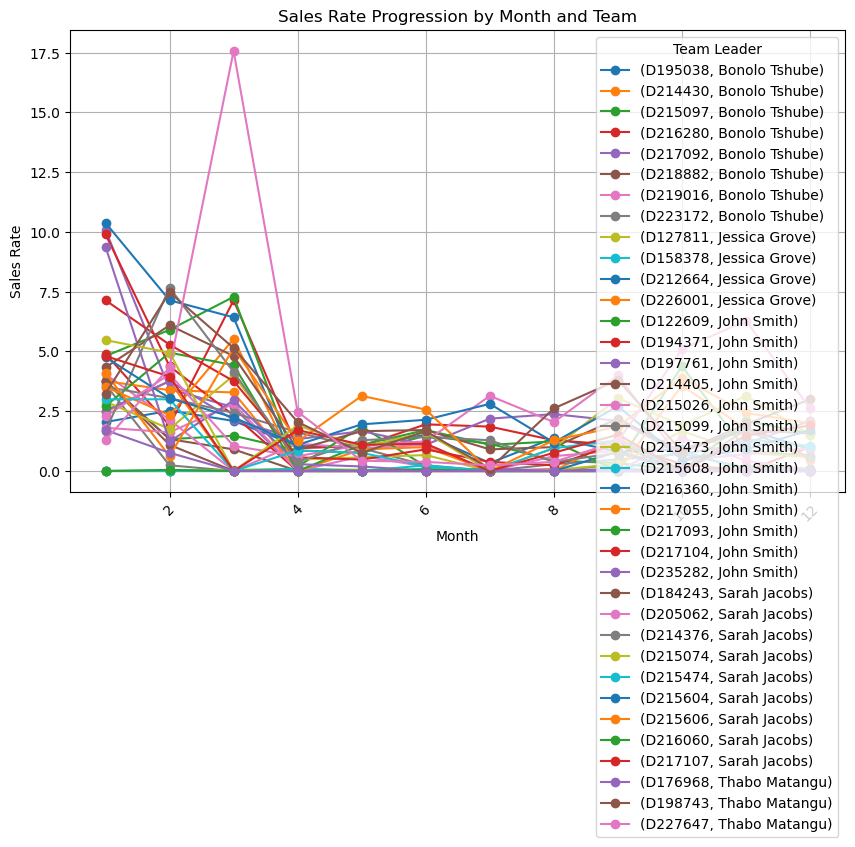

In [155]:
fig, ax = plt.subplots(figsize=(10, 6))

for key, grp in monthlyProgression.groupby(level='Team Leader '):
    grp.T.plot(kind='line', marker='o', ax=ax, label=key)

plt.xlabel('Month') 
plt.ylabel('Sales Rate') 
plt.title('Sales Rate Progression by Month and Team') 
plt.legend(title='Team Leader') 
plt.xticks(rotation=45) 
plt.grid(True)

plt.show()

In [157]:
import seaborn as sns

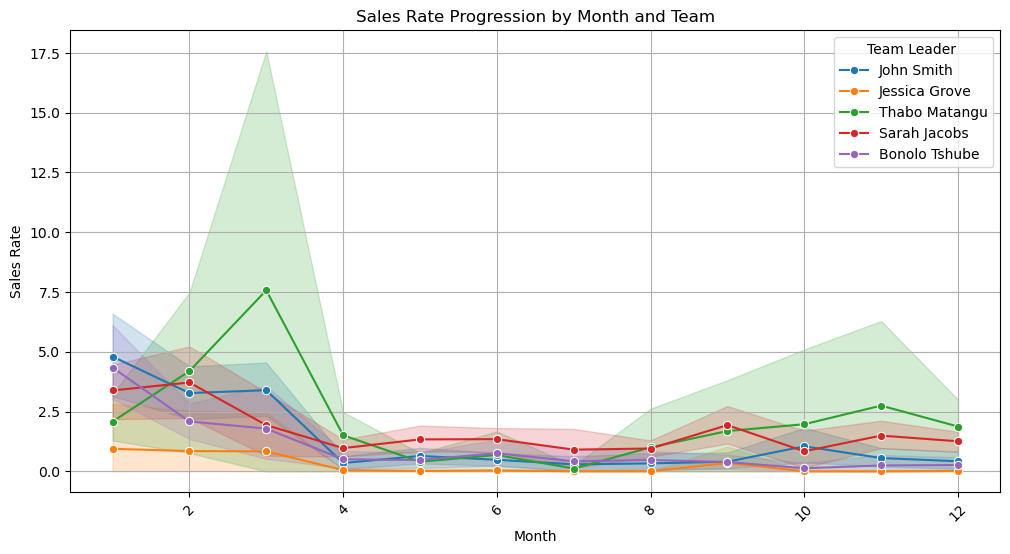

In [163]:
df_reset = monthlyProgression.reset_index()

df_melted = pd.melt(df_reset, id_vars=['Sale Consultant Employee Number', 'Team Leader '], var_name='Month', value_name='Sales Rate')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Month', y='Sales Rate', hue='Team Leader ', marker='o')

plt.xlabel('Month') 
plt.ylabel('Sales Rate') 
plt.title('Sales Rate Progression by Month and Team') 
plt.xticks(rotation=45) 
plt.grid(True) 
plt.legend(title='Team Leader ') 
plt.show()

From the analysis performed it is clear that there is a strong correlation between the team lead and the number of sales an Employee attempts. Therefore the solution proposed was around creating a time off incentive for teams that performed well. Structure was also added to the different teams to allow them to focus on the proactive calls in a way that fosters a strong team bond. Further analysis on this solution can be found in the solutions document at Best-Service-International-Case-Study/Solution.